In [1]:
!nvidia-smi

Sun Nov 12 18:26:15 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.3/78.2 GB disk)


In [1]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
#model = YOLO('yolov8s.pt')

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key=XXXXXXXXXXXXXX)
project = rf.workspace("deep-ml-lab").project("coat-95efh")
dataset = project.version(1).download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to COAT-1 in yolov8:: 100%|██████████| 4180/4180 [00:01<00:00, 3748.70it/s]


In [6]:
%cd {HOME}

/content


In [7]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=40 imgsz=640 plots=True

100% 21.5M/21.5M [00:00<00:00, 97.3MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/COAT-1/data.yaml, epochs=40, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=Fa

In [8]:
!ls {HOME}/runs/detect/train/

args.yaml					    results.png		   val_batch0_pred.jpg
confusion_matrix.png				    train_batch0.jpg	   val_batch1_labels.jpg
events.out.tfevents.1699813638.ea689a0ea704.1354.0  train_batch1.jpg	   val_batch1_pred.jpg
F1_curve.png					    train_batch2790.jpg    val_batch2_labels.jpg
P_curve.png					    train_batch2791.jpg    val_batch2_pred.jpg
PR_curve.png					    train_batch2792.jpg    weights
R_curve.png					    train_batch2.jpg
results.csv					    val_batch0_labels.jpg


/content


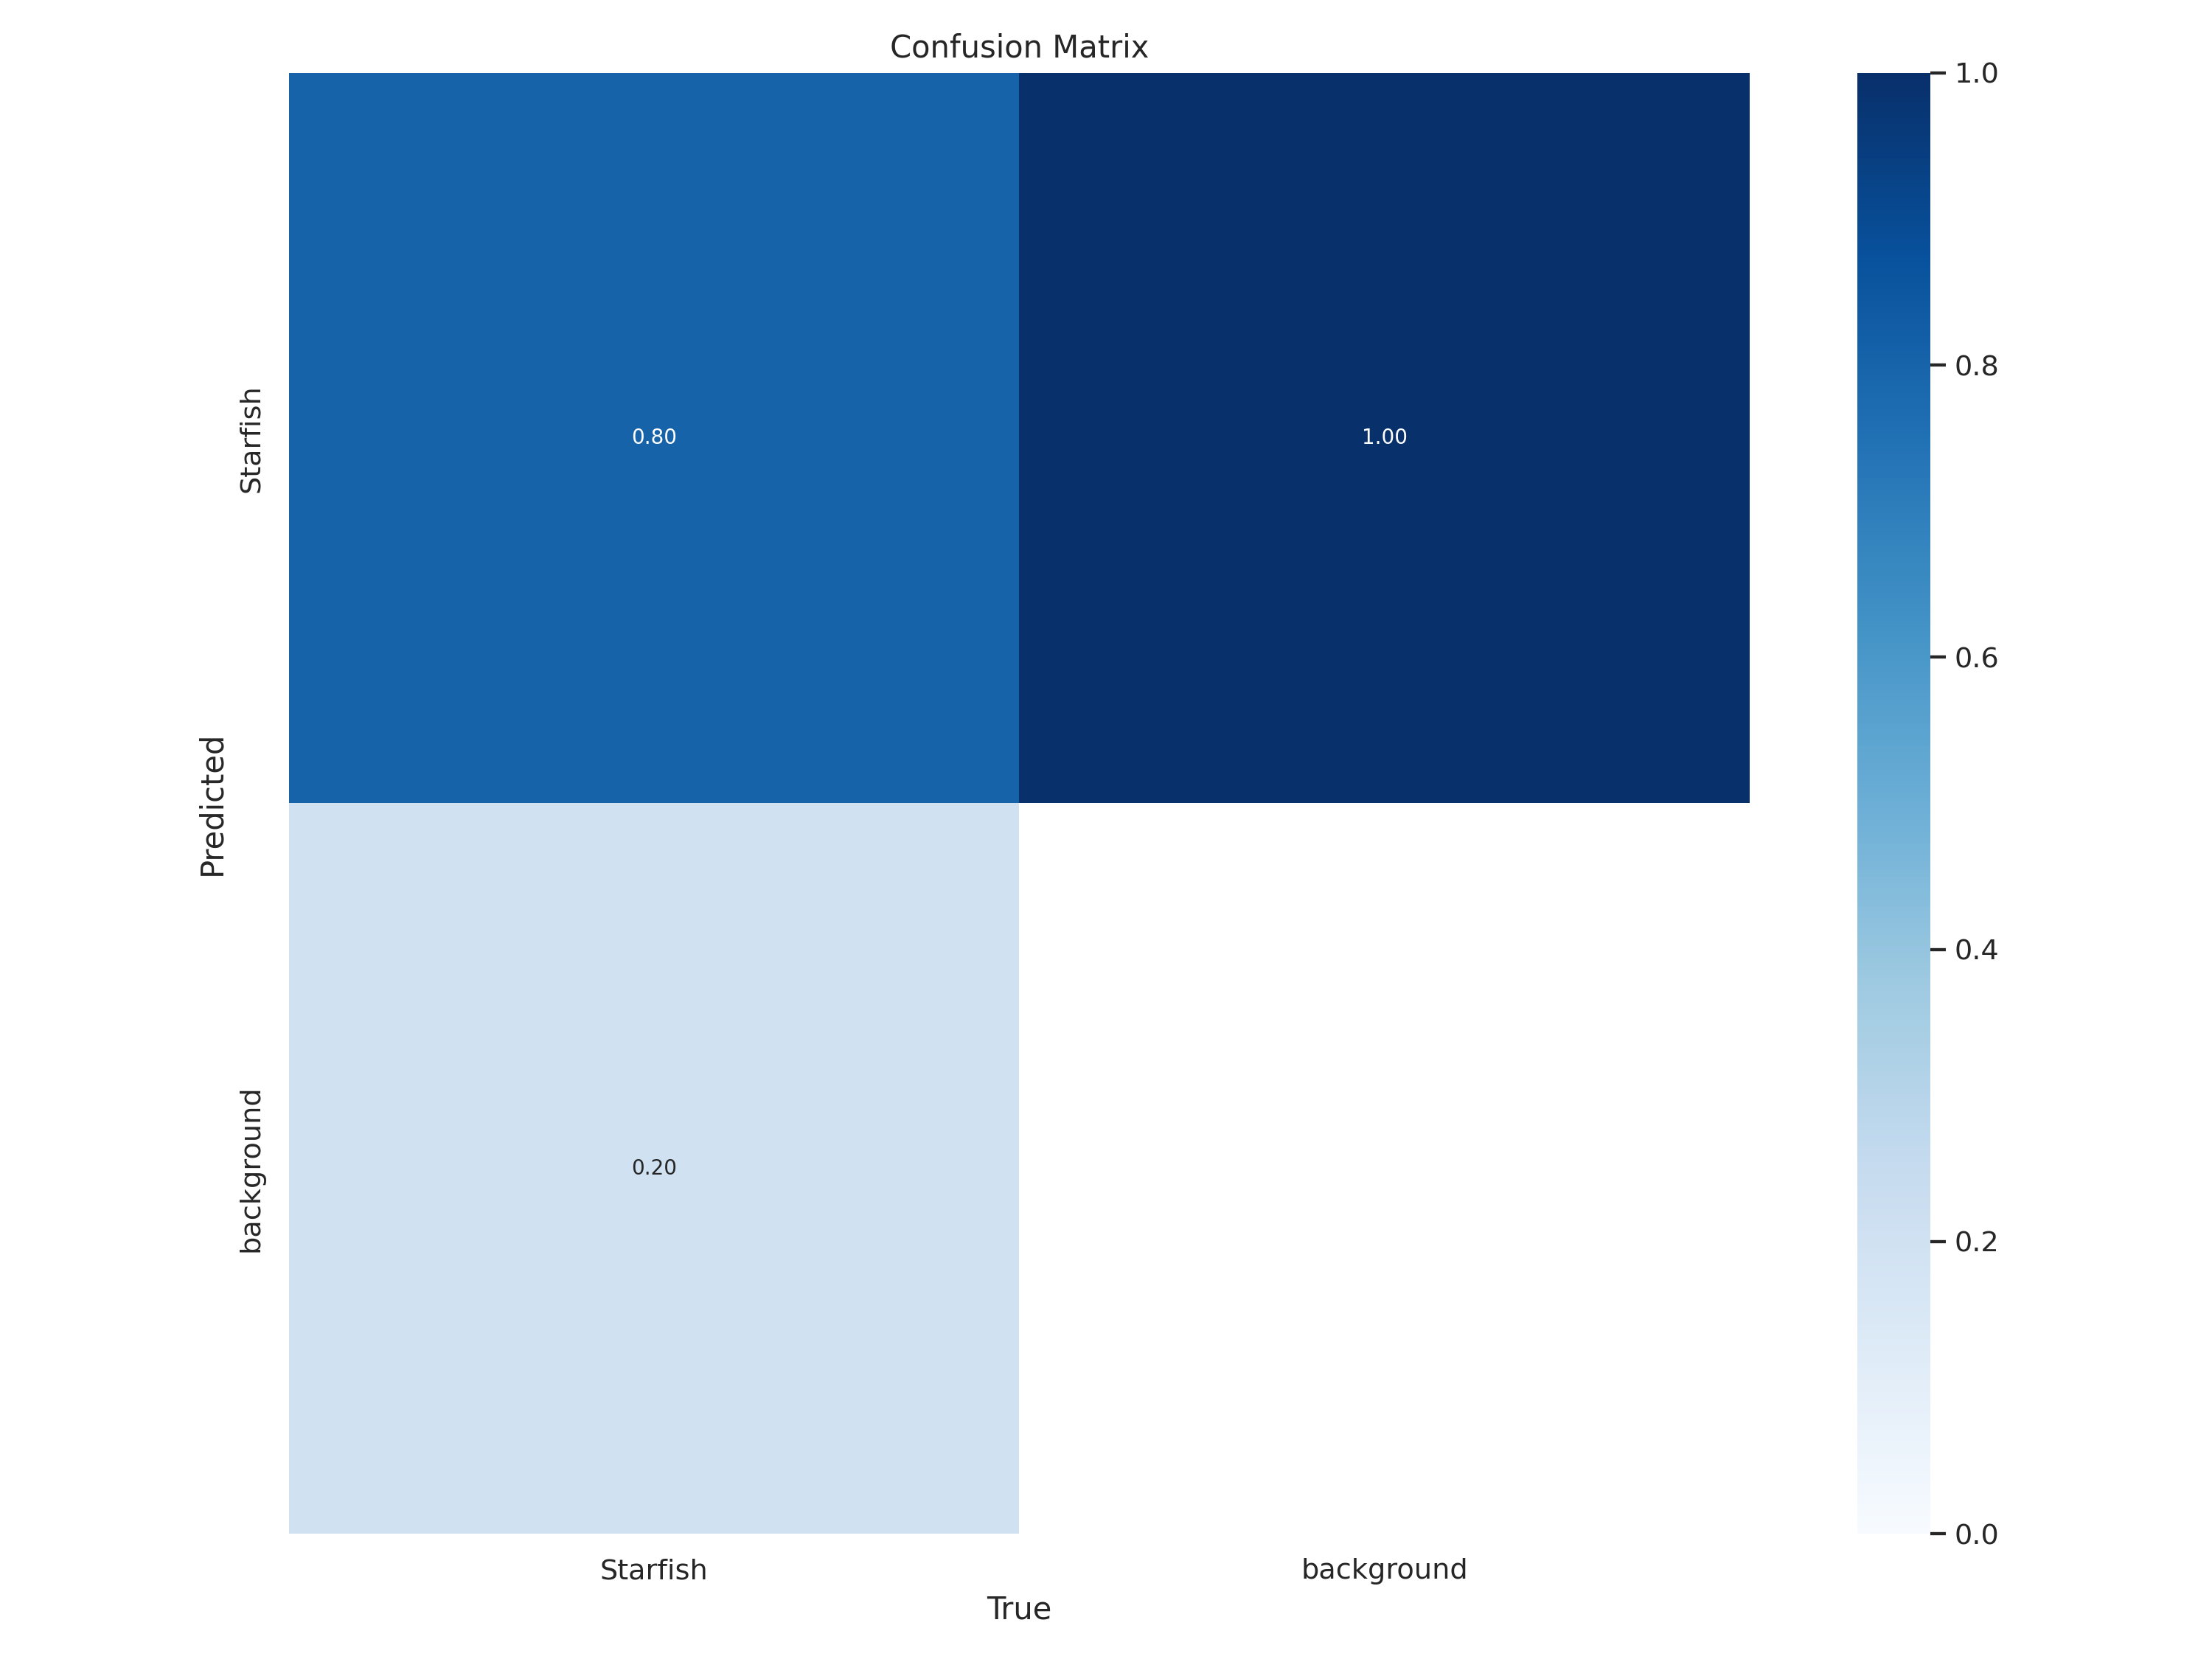

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


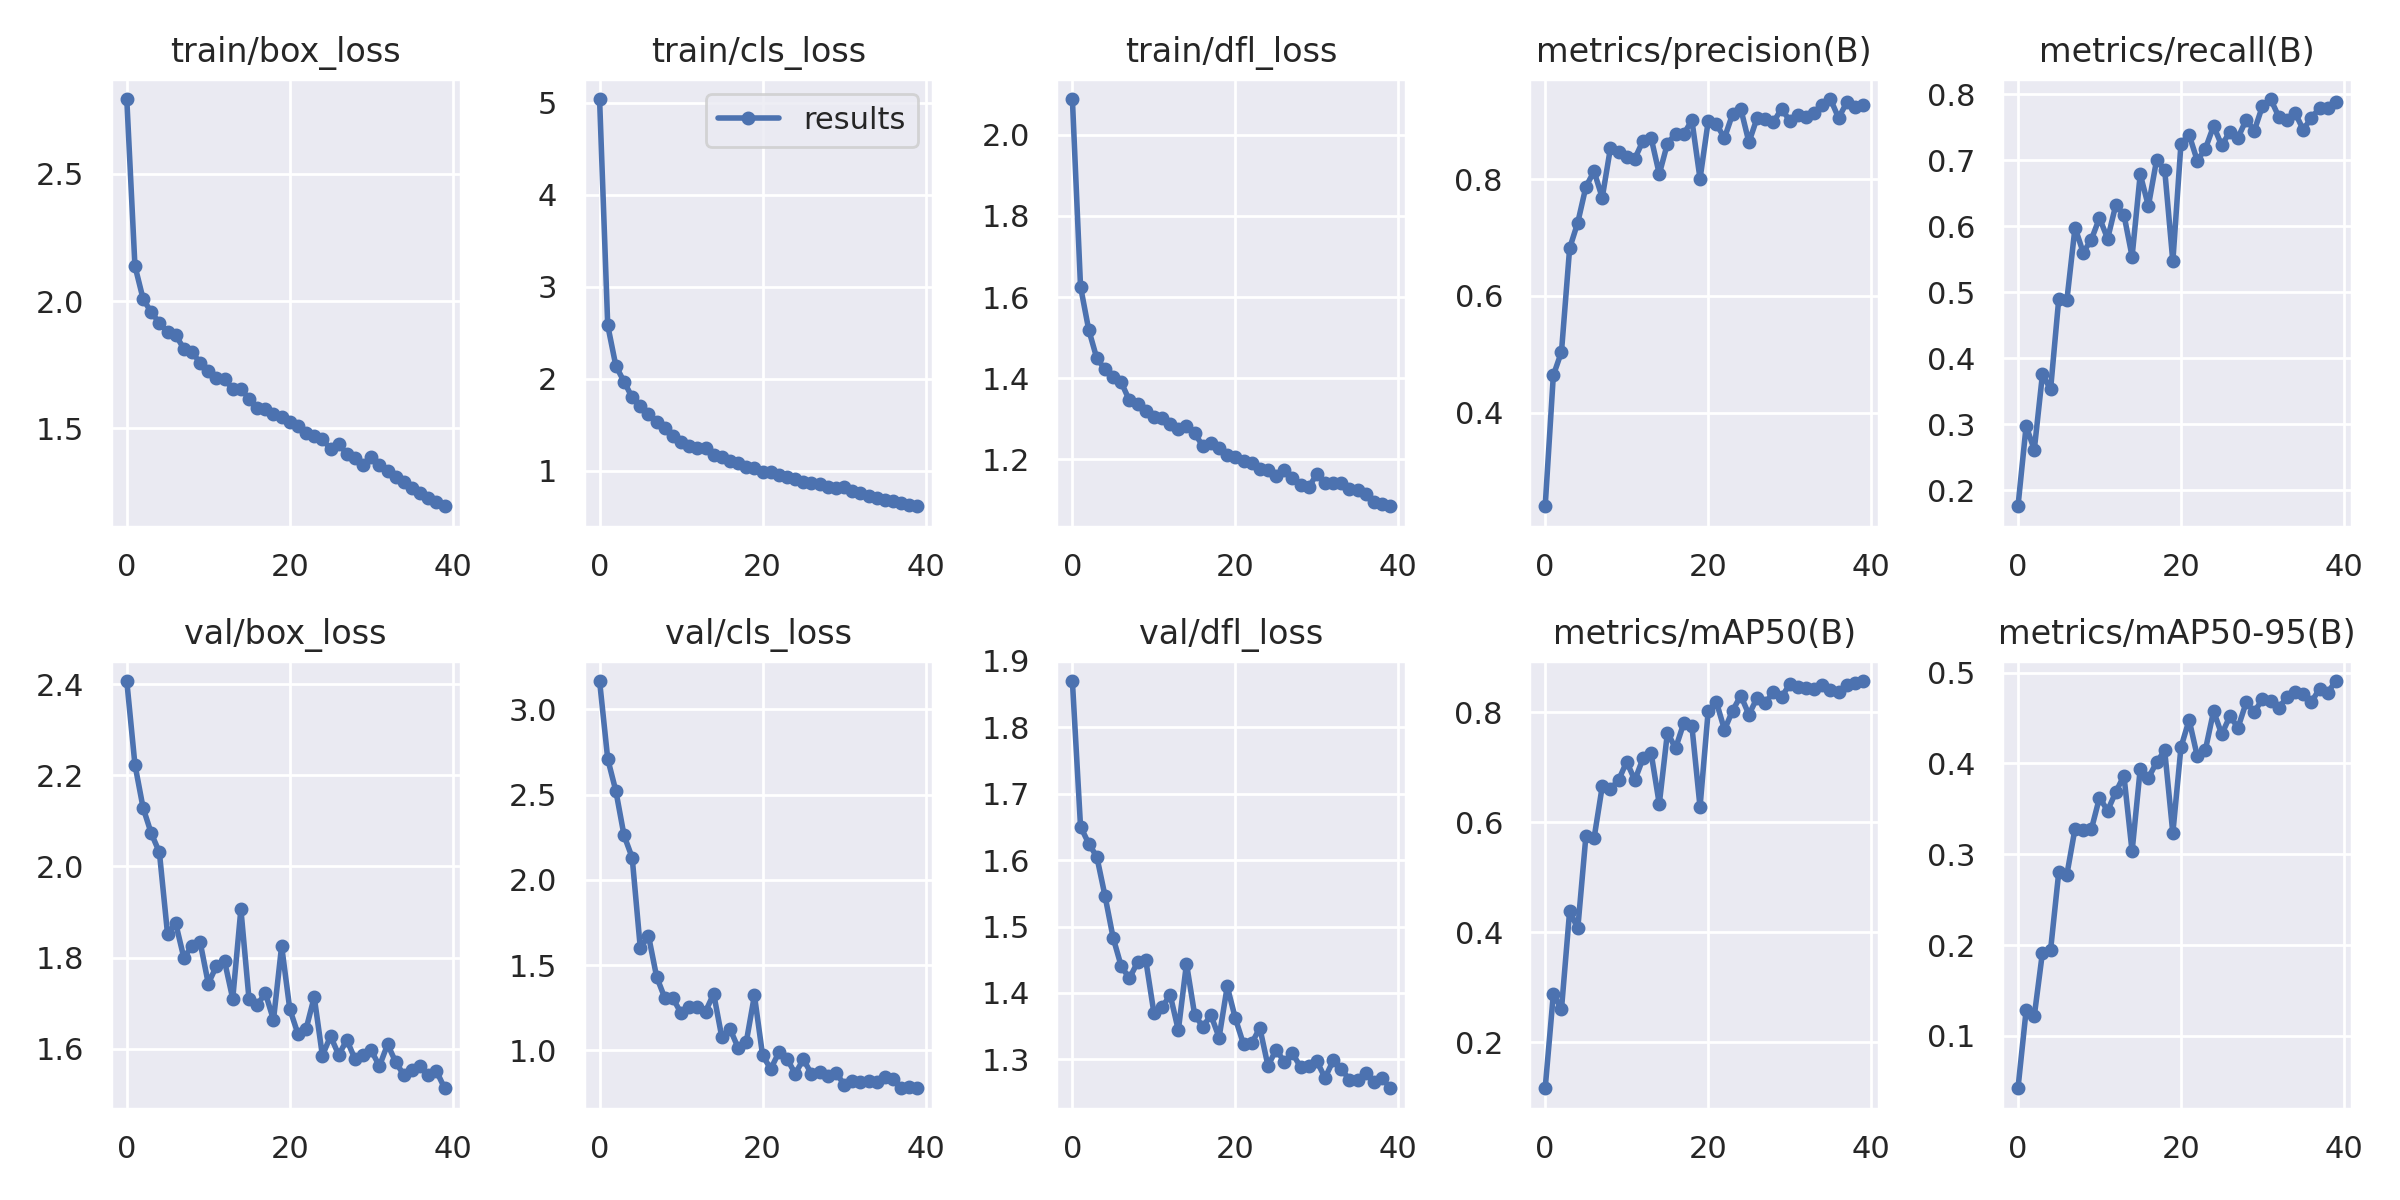

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


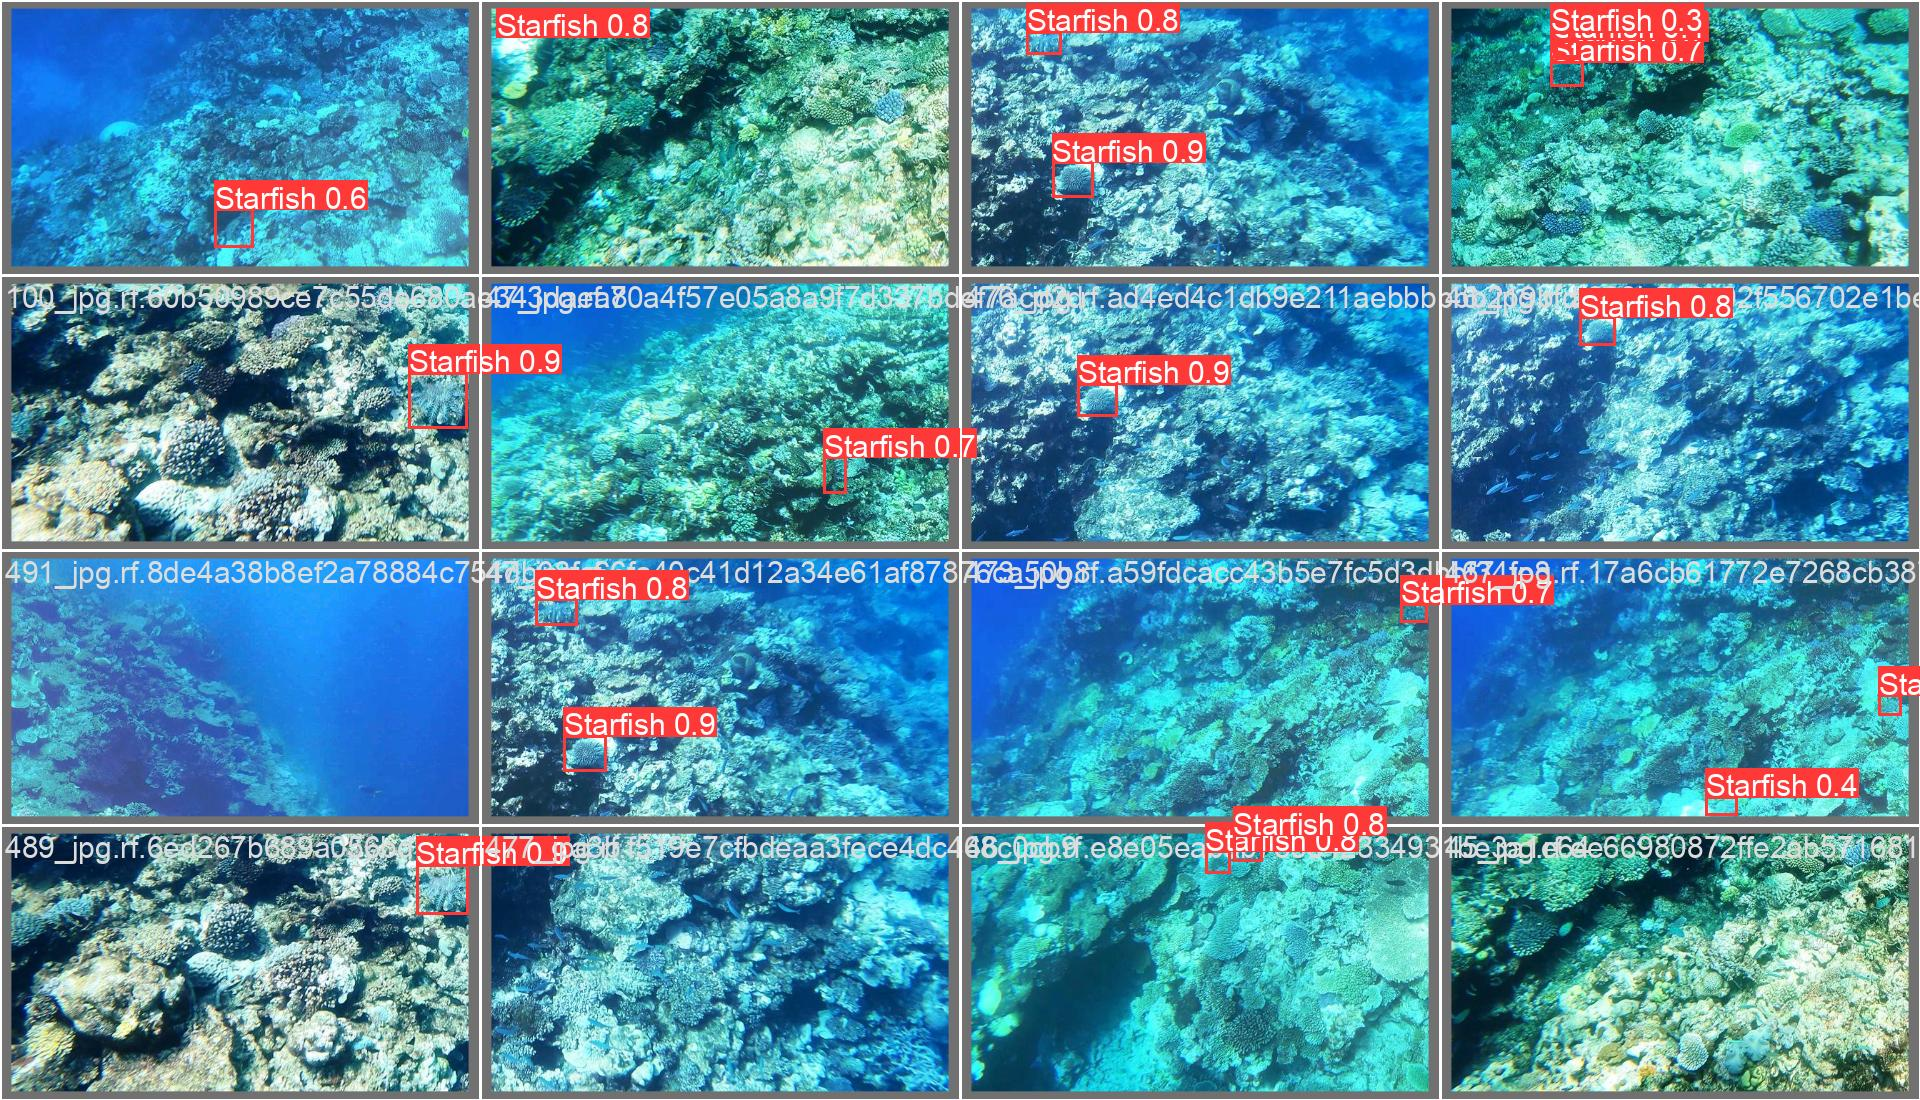

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [12]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-11-12 19:02:20.243156: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-12 19:02:20.243214: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-12 19:02:20.243249: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-12 19:02:20.251282: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-12 19:02:21.397755: W ten

In [13]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-11-12 19:02:46.542229: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-12 19:02:46.542294: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-12 19:02:46.542338: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-12 19:02:46.553195: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-12 19:02:48.157098: W ten

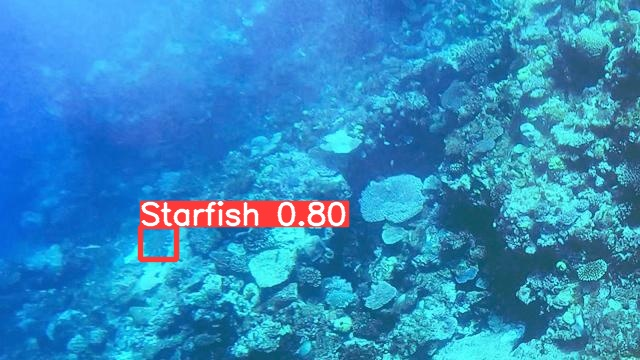

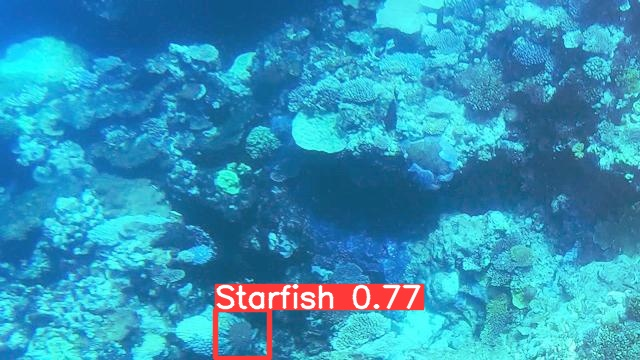

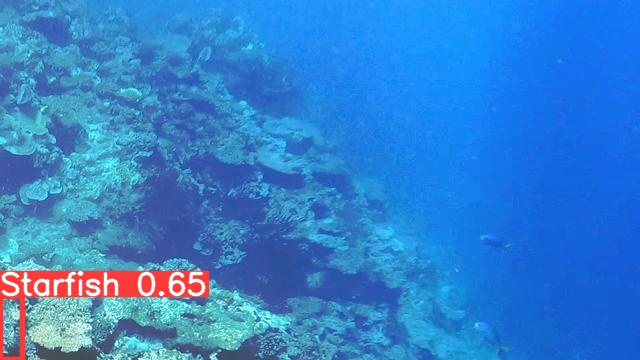

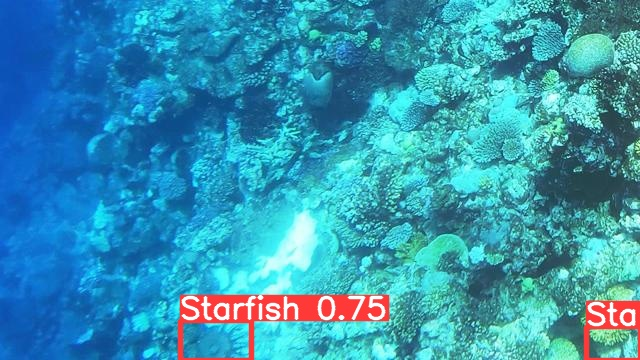

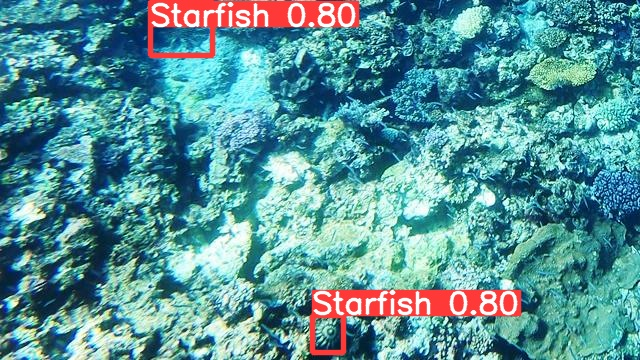

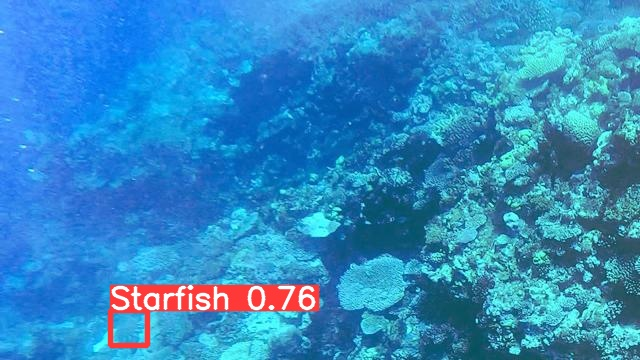

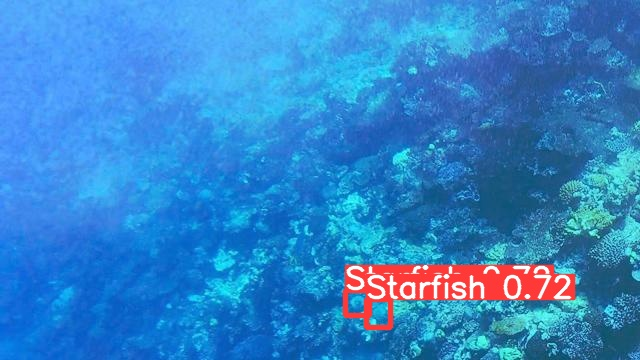

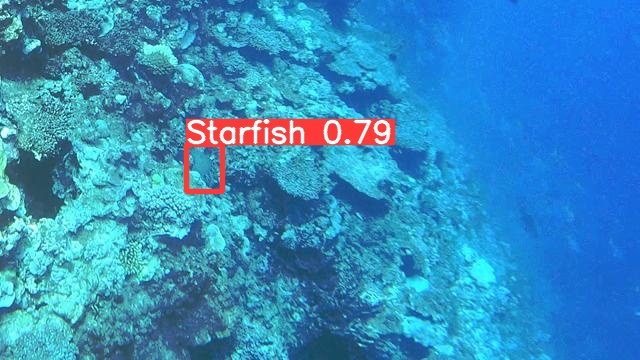

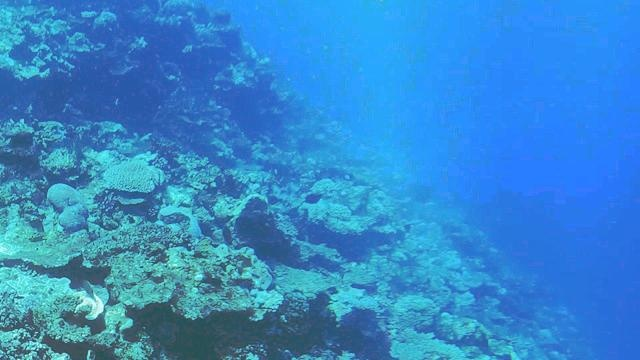

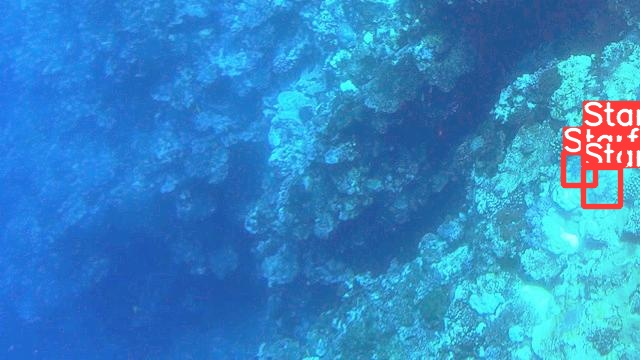

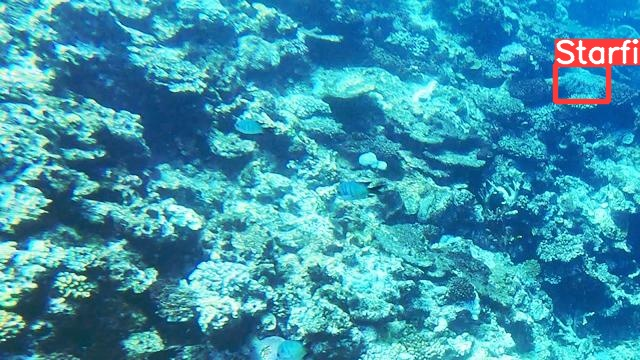

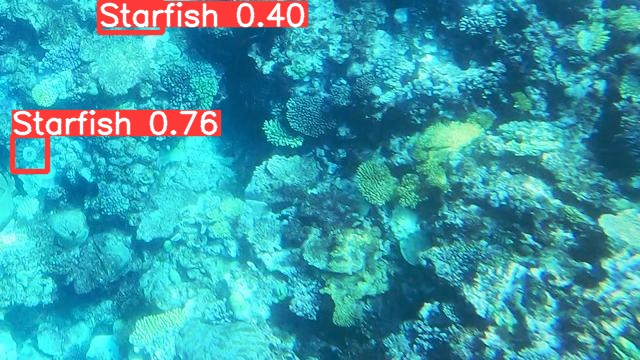

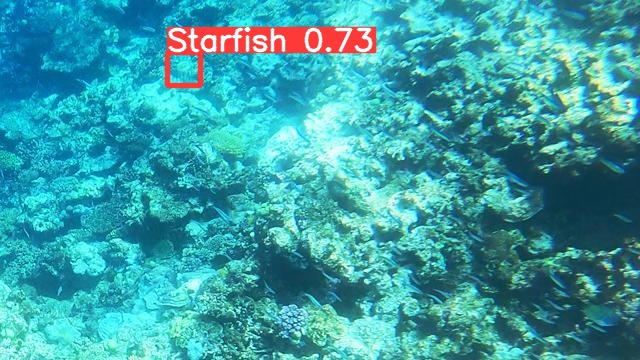

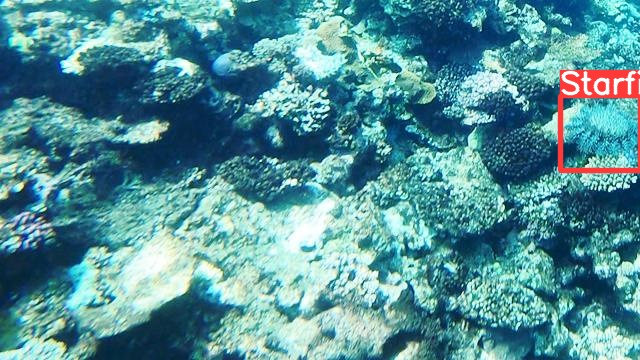

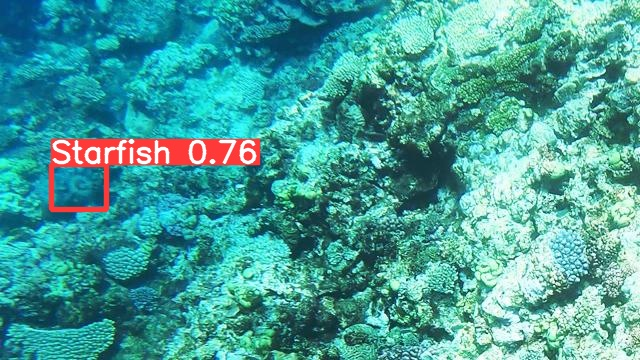

In [14]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[65:80]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [2]:
# Load a pretrained YOLOv8n model
model = YOLO('./runs/detect/train/weights/best.pt')

# Run inference on 'bus.jpg' with arguments
model.predict(source = './starfish/train/images', save=True, imgsz=1280, conf=0.25)




image 1/716 /home/el_rancio_dave/Documents/IA/YOLO/starfish/train/images/0.jpg: 736x1280 (no detections), 46.1ms
WARNING ⚠️ NMS time limit 0.550s exceeded
image 2/716 /home/el_rancio_dave/Documents/IA/YOLO/starfish/train/images/1.jpg: 736x1280 1 Starfish, 38.8ms
image 3/716 /home/el_rancio_dave/Documents/IA/YOLO/starfish/train/images/10.jpg: 736x1280 2 Starfishs, 38.8ms
image 4/716 /home/el_rancio_dave/Documents/IA/YOLO/starfish/train/images/100.jpg: 736x1280 1 Starfish, 38.8ms
image 5/716 /home/el_rancio_dave/Documents/IA/YOLO/starfish/train/images/101.jpg: 736x1280 1 Starfish, 39.0ms
image 6/716 /home/el_rancio_dave/Documents/IA/YOLO/starfish/train/images/102.jpg: 736x1280 1 Starfish, 39.2ms
image 7/716 /home/el_rancio_dave/Documents/IA/YOLO/starfish/train/images/103.jpg: 736x1280 1 Starfish, 39.0ms
image 8/716 /home/el_rancio_dave/Documents/IA/YOLO/starfish/train/images/104.jpg: 736x1280 1 Starfish, 38.9ms
image 9/716 /home/el_rancio_dave/Documents/IA/YOLO/starfish/train/images/105

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Starfish'}
 orig_img: array([[[205, 146,  36],
         [201, 141,  28],
         [205, 143,  29],
         ...,
         [254, 151,   0],
         [254, 151,   0],
         [253, 150,   0]],
 
        [[211, 152,  42],
         [206, 146,  33],
         [208, 145,  31],
         ...,
         [254, 151,   0],
         [254, 151,   0],
         [253, 150,   0]],
 
        [[201, 145,  32],
         [205, 145,  31],
         [209, 146,  31],
         ...,
         [254, 151,   0],
         [254, 151,   0],
         [253, 150,   0]],
 
        ...,
 
        [[235, 158,  61],
         [255, 197,  82],
         [248, 204,  57],
         ...,
         [187, 130,  15],
         [188, 133,  12],
         [189, 135,  11]],
 
        [[241, 157,  62],
         [237, 164,  60],
         [243, 186,  63],
         ...,
         [181, 136,  31],
 

In [2]:
# Load a pretrained YOLOv8n model
model = YOLO('./runs/detect/train/weights/best.pt')

# Run inference on 'bus.jpg' with arguments
model.predict(source = './starfish/video/images', save=True, imgsz=1280, conf=0.25)


image 1/480 /home/el_rancio_dave/Documents/IA/YOLO/starfish/video/images/0.jpg: 736x1280 (no detections), 45.4ms
image 2/480 /home/el_rancio_dave/Documents/IA/YOLO/starfish/video/images/1.jpg: 736x1280 (no detections), 41.5ms
image 3/480 /home/el_rancio_dave/Documents/IA/YOLO/starfish/video/images/10.jpg: 736x1280 (no detections), 41.5ms
image 4/480 /home/el_rancio_dave/Documents/IA/YOLO/starfish/video/images/100.jpg: 736x1280 1 Starfish, 41.9ms
image 5/480 /home/el_rancio_dave/Documents/IA/YOLO/starfish/video/images/101.jpg: 736x1280 1 Starfish, 41.4ms
image 6/480 /home/el_rancio_dave/Documents/IA/YOLO/starfish/video/images/102.jpg: 736x1280 1 Starfish, 41.8ms
image 7/480 /home/el_rancio_dave/Documents/IA/YOLO/starfish/video/images/103.jpg: 736x1280 (no detections), 41.8ms
image 8/480 /home/el_rancio_dave/Documents/IA/YOLO/starfish/video/images/104.jpg: 736x1280 (no detections), 41.4ms
image 9/480 /home/el_rancio_dave/Documents/IA/YOLO/starfish/video/images/105.jpg: 736x1280 (no dete

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Starfish'}
 orig_img: array([[[222, 233, 123],
         [215, 224, 113],
         [216, 225, 109],
         ...,
         [255, 151,   0],
         [255, 151,   0],
         [255, 151,   0]],
 
        [[225, 225, 119],
         [225, 222, 117],
         [221, 216, 107],
         ...,
         [255, 150,   0],
         [255, 150,   0],
         [255, 150,   0]],
 
        [[229, 207, 111],
         [228, 203, 107],
         [236, 202, 108],
         ...,
         [255, 149,   1],
         [254, 148,   0],
         [254, 148,   0]],
 
        ...,
 
        [[ 69,  84,  63],
         [ 71,  84,  68],
         [ 75,  83,  73],
         ...,
         [200, 127,   0],
         [183, 110,   0],
         [183, 111,   0]],
 
        [[ 71,  81,  68],
         [ 72,  82,  69],
         [ 73,  79,  68],
         ...,
         [201, 132,   0],
 

In [3]:
# Load a pretrained YOLOv8n model
model = YOLO('./runs/detect/train/weights/best.pt')

# Run inference on 'bus.jpg' with arguments
model.predict(source = './starfish/prueba/images', save=True, imgsz=1280, conf=0.25)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1248 /home/el_rancio_dave/Documents/IA/YOLO/starfish/prueba/images/0.jpg: 736x1280 3 Starfishs, 42.5ms
image 2/1248 /home/el_rancio_dave/Documents/IA/YOLO/starfish/prueba/images/1.jpg: 736x1280 2 Starfishs, 34.8ms
image 3/1248 /home/el_rancio_dave/Documents/IA/YOLO/starfish/prueba/images/10.jpg: 736x1280 2 Starfishs, 34.4ms
image 4/1248 /home/el_rancio_dave/Documents/IA/YOLO/starfish/prueba/images/100.jpg: 736x1280 (no detections), 34.5ms
image

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Starfish'}
 orig_img: array([[[144,  93,   0],
         [145,  94,   0],
         [144,  93,   0],
         ...,
         [101, 104,  55],
         [105, 110,  59],
         [111, 119,  66]],
 
        [[145,  94,   0],
         [146,  95,   0],
         [146,  95,   0],
         ...,
         [103, 106,  57],
         [104, 109,  58],
         [104, 112,  59]],
 
        [[145,  93,   0],
         [146,  94,   0],
         [145,  94,   0],
         ...,
         [103, 103,  55],
         [114, 118,  66],
         [129, 135,  80]],
 
        ...,
 
        [[233, 195,  31],
         [231, 194,  30],
         [218, 183,  19],
         ...,
         [143, 160, 103],
         [140, 157, 106],
         [140, 156, 108]],
 
        [[219, 174,  16],
         [202, 160,   1],
         [199, 160,   0],
         ...,
         [140, 157, 100],
 